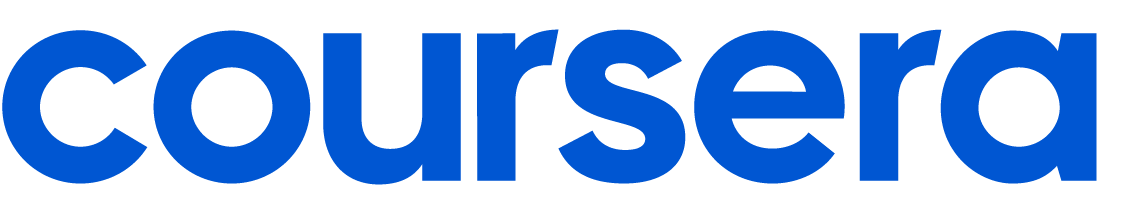

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import any other packages you may want to use
import scipy.stats
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

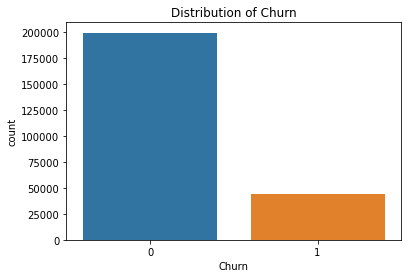

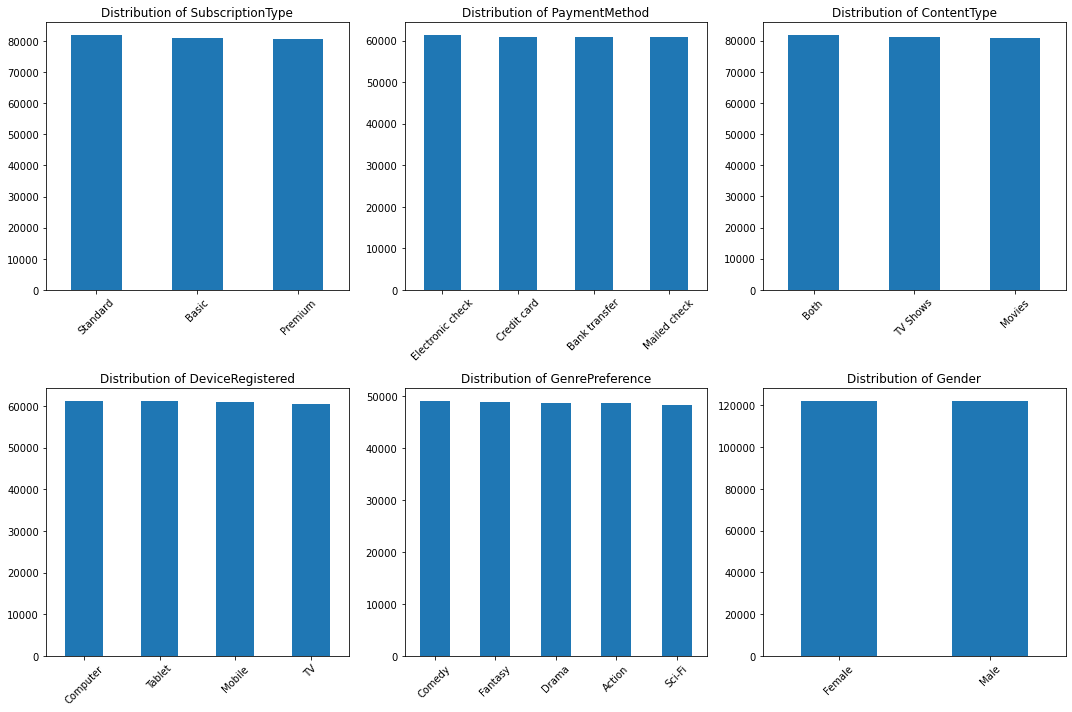

In [6]:
# your code here (optional)
test_df = test_df.dropna()
train_df = train_df.dropna()

test_df = test_df.drop_duplicates()
train_df = train_df.drop_duplicates()


# Plot the distribution of the target variable 'Churn'
sns.countplot(data=train_df, x='Churn')
plt.title('Distribution of Churn')
plt.show()

# Finding distributions of the categorical features
categorical_features = ['SubscriptionType', 'PaymentMethod', 'ContentType', 'DeviceRegistered', 'GenrePreference', 'Gender']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(categorical_features):
    train_df[col].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()


The distributions of the categorical features are even and looks uniform. 

Below is zoom in on the y-axis.

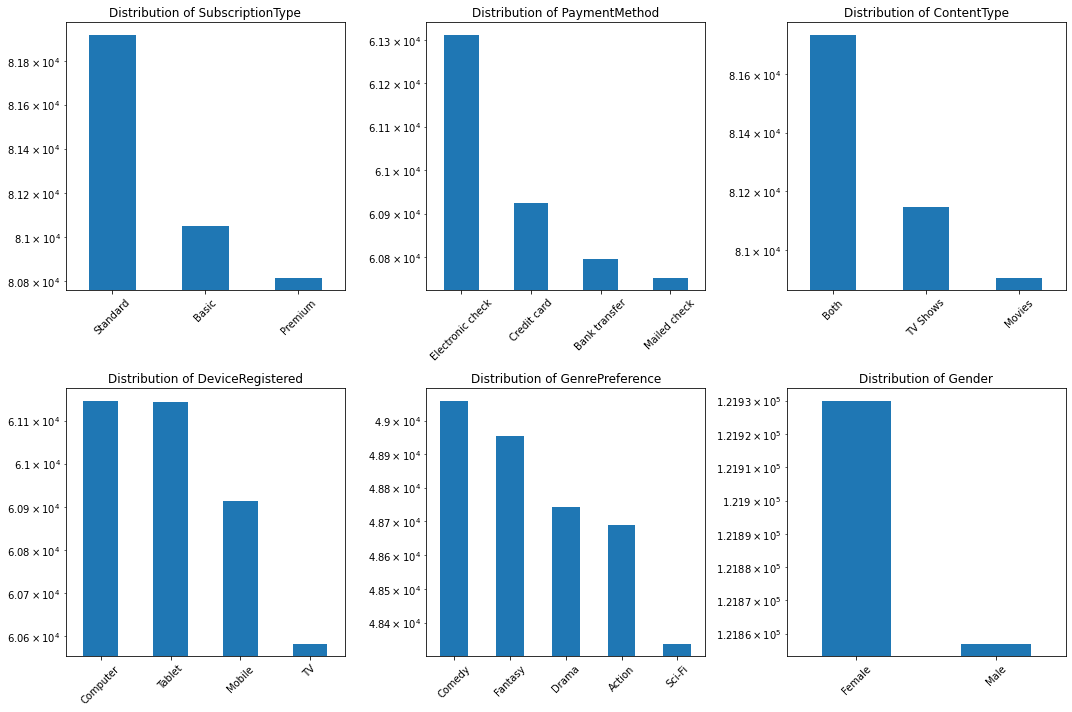

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(categorical_features):
    train_df[col].value_counts().plot(kind='bar', ax=axs[i], logy=True)
    axs[i].set_title(f'Distribution of {col}')
    axs[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

In [8]:
# Set the style of seaborn plot
sns.set(style="whitegrid")

# Function to plot a boxplot
def plot_box(data, x_column, y_column, title, xlabel, ylabel, figsize=(8, 4)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=x_column, y=y_column, data=data)
    plt.title(title, size=20)
    plt.xlabel(xlabel, size=12)
    plt.ylabel(ylabel, size=12)


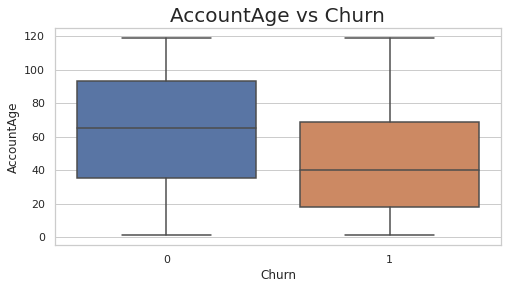

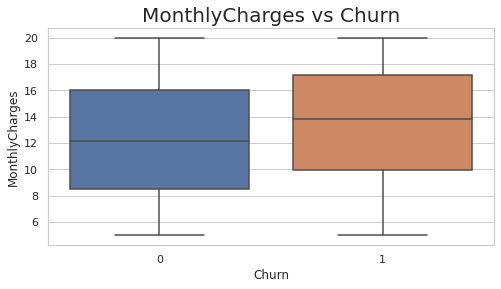

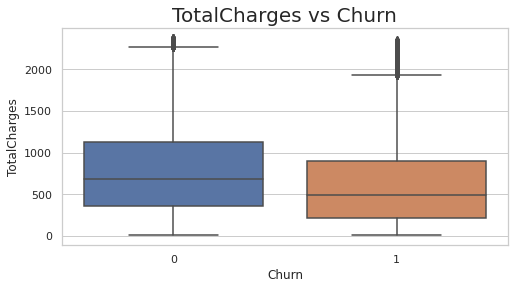

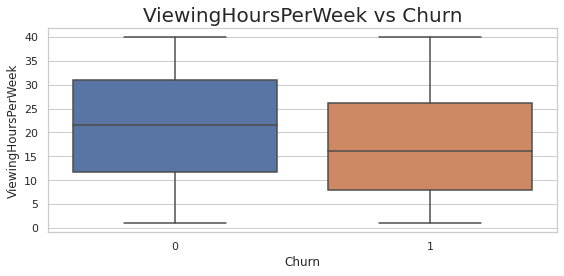

In [9]:
# Plot the distribution of some numerical features
numerical_features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek']

# Plot histograms for each numerical feature
for i, col in enumerate(numerical_features):
    plot_box(train_df, 'Churn', col, f'{col} vs Churn', 'Churn', col)

plt.tight_layout()
plt.show()

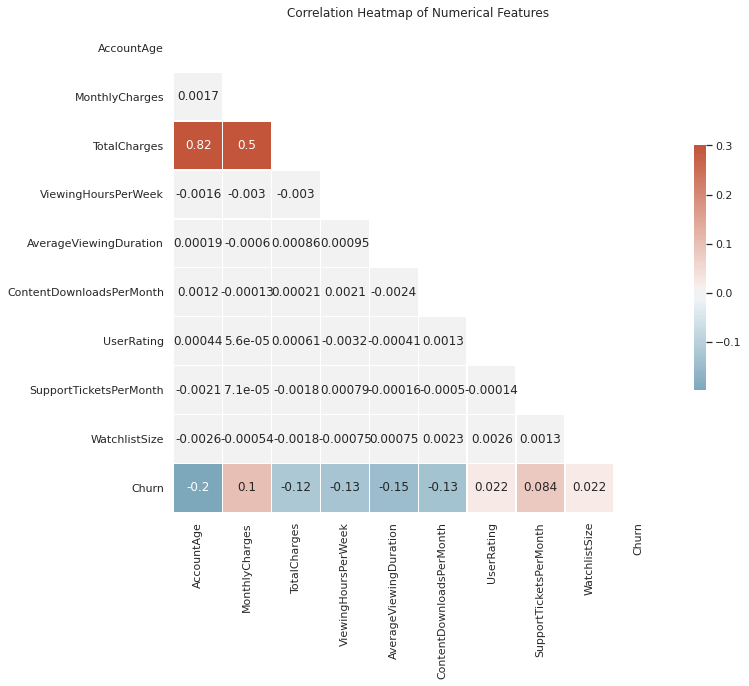

In [10]:
# Select numerical columns
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
corr = train_df[numerical_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

From the heatmap above, there are several insights we can see:
1. The correlation between 'AccountAge' and 'TotalCharges' is strongly positive (0.82). This is obvious because the longer the customer own the account, the more they are paying over time. 
2. 'TotalCharges' and 'MonthlyCharges' has positive correlation (0.5). The recurring charges contributes to the total charge. 
3. 'AccountAge', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPermonths' all have negative correlation with 'Churn' because the longer the customer own the account, the longer the spend watching, and the more they pay would result in them likely to cancel the subscription. 

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

# One Hot Encoding and Standard Scaler

Let's start with encoding the categorical variables. We'll use one-hot encoding, which is a common method for converting categorical variables into a format that works better with classification and regression algorithms. It creates new binary columns for each category/label present in the original columns

In [11]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
# dummy_clf = DummyClassifier(strategy="stratified")
# dummy_clf.fit(train_df.drop(['CustomerID', 'Churn'], axis=1), train_df.Churn)

# Initialize one-hot-encoder
ohe = OneHotEncoder(sparse=False, drop='first')

# Select categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('CustomerID')  # We won't one-hot encode the CustomerID

# Fit and transform the one hot encoder on the data
train_encoded = ohe.fit_transform(train_df[categorical_columns])

# Get feature names
feature_names = ohe.get_feature_names(categorical_columns)

# Create a DataFrame with the one-hot encoded categorical variables
train_encoded = pd.DataFrame(train_encoded, columns=feature_names)

# Concatenate the original numerical columns and the one-hot encoded columns
train_data_encoded = pd.concat([train_df.select_dtypes(include=['int64', 'float64']), train_encoded], axis=1)

train_data_encoded.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


We have successfully one-hot encoded the categorical variables in the training data. We can see that new binary columns have been created for each category in each of the original categorical variables. For example, for SubscriptionType, we now have SubscriptionType_Premium and SubscriptionType_Standard, where a 1 indicates that the original SubscriptionType was 'Premium' or 'Standard', respectively. The original 'Basic' category is represented by a 0 in both of these new columns due to the drop='first' argument in the OneHotEncoder.

Next, let's scale the numerical variables. For this, we can use standard scaling, which transforms the variables to have a mean of 0 and a standard deviation of 1. This ensures that all numerical features have the same scale, which is important for many machine learning algorithms.

In [12]:
# Initialize standard scaler
scaler = StandardScaler()

# Select numerical columns
numerical_columns = train_data_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Churn')  # We won't scale the target variable

# Fit the scaler on the training data
scaler.fit(train_data_encoded[numerical_columns])

# Scale the training data
train_data_encoded[numerical_columns] = scaler.transform(train_data_encoded[numerical_columns])

# Show the first few rows of the preprocessed training data
train_data_encoded.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,-1.169131,-0.331703,-1.012550,1.445777,-0.568906,-1.005712,-0.715179,-0.175519,-1.253786,0,...,1.732672,-0.575053,-0.578590,-0.501939,-0.499914,-0.501266,2.010816,1.000299,-1.001572,-1.002353
1,-0.089945,-1.690423,-0.871303,1.062671,-1.317459,-0.450971,0.411960,1.216976,1.526687,0,...,-0.577143,-0.575053,1.728341,-0.501939,-0.499914,-0.501266,-0.497310,1.000299,-1.001572,0.997652
2,0.376731,-0.088741,0.254353,-1.165718,-0.691019,-0.104258,1.069988,0.520728,-1.531833,0,...,-0.577143,-0.575053,-0.578590,-0.501939,-0.499914,1.994948,-0.497310,1.000299,0.998430,0.997652
3,-0.819125,-1.207816,-0.990879,0.663322,0.777613,0.381141,1.102179,-0.871766,1.665711,0,...,-0.577143,-0.575053,1.728341,-0.501939,2.000344,-0.501266,-0.497310,1.000299,0.998430,0.997652
4,-0.089945,1.031143,0.412150,-0.037246,-0.928765,-0.312285,0.531014,-0.175519,-1.670857,0,...,-0.577143,1.738970,-0.578590,1.992275,-0.499914,-0.501266,-0.497310,-0.999701,-1.001572,-1.002353


Now, let's perform the same transformations (one-hot encoding and scaling) on the test data. We use the parameters (i.e., the category mapping for one-hot encoding and the mean and standard deviation for scaling) that we learned from the training data to transform the test data. This is to ensure that the same transformation is applied consistently across the training and test datasets.

In [13]:
# One-hot encode the categorical variables in the test data
test_encoded = ohe.transform(test_df[categorical_columns])
test_encoded = pd.DataFrame(test_encoded, columns=feature_names)

# Concatenate the original numerical columns and the one-hot encoded columns
test_data_encoded = pd.concat([test_df.select_dtypes(include=['int64', 'float64']), test_encoded], axis=1)

# Scale the numerical variables in the test data
test_data_encoded[numerical_columns] = scaler.transform(test_data_encoded[numerical_columns])

# Show the first few rows of the preprocessed test data
test_data_encoded.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Premium,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,-0.644122,1.242876,-0.137084,0.767017,0.594196,1.213252,0.450126,-0.871766,1.526687,1.420046,...,-0.577143,1.738970,-0.578590,1.992275,-0.499914,-0.501266,-0.497310,1.000299,-1.001572,-1.002353
1,0.493400,-0.595673,0.023990,1.456060,-0.696379,1.282595,-0.849307,-0.871766,1.387664,-0.704202,...,-0.577143,1.738970,-0.578590,-0.501939,-0.499914,-0.501266,-0.497310,-0.999701,0.998430,-1.002353
2,-1.606640,0.584230,-1.291688,-1.147346,0.953367,-0.728341,1.561050,-0.871766,1.387664,-0.704202,...,-0.577143,-0.575053,-0.578590,-0.501939,-0.499914,-0.501266,2.010816,-0.999701,-1.001572,0.997652
3,0.814239,0.662424,1.148428,1.341570,1.677817,-0.728341,1.680308,-1.568014,1.526687,-0.704202,...,-0.577143,-0.575053,1.728341,1.992275,-0.499914,-0.501266,-0.497310,-0.999701,0.998430,0.997652
4,0.901741,-0.019563,0.723051,0.266946,-0.434722,-1.283082,-0.134890,0.520728,-1.670857,-0.704202,...,-0.577143,-0.575053,1.728341,-0.501939,2.000344,-0.501266,-0.497310,-0.999701,-1.001572,-1.002353


# Logistic Regression

              precision    recall  f1-score   support

           0       0.91      0.68      0.78    199605
           1       0.32      0.69      0.44     44182

    accuracy                           0.68    243787
   macro avg       0.61      0.68      0.61    243787
weighted avg       0.80      0.68      0.71    243787



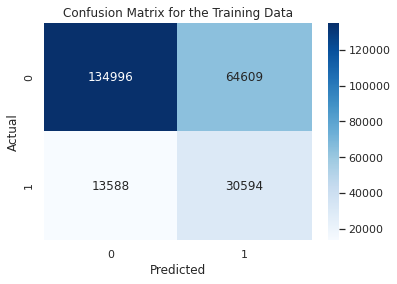

In [14]:
# Separate features and target from the training data
X_train = train_data_encoded.drop('Churn', axis=1)
y_train = train_data_encoded['Churn']

# Initialize the logistic regression model with balanced class weights
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Fit the model on the resampled training data
logreg.fit(X_train, y_train)

# Predict the target for the training data
y_train_pred = logreg.predict(X_train)

# Print the classification report for the training data
print(classification_report(y_train, y_train_pred))

# Plot the confusion matrix for the training data
conf_mat = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for the Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

From the classification report, we can see that the logistic regression model has a recall of 0.69 for the positive class (Churn = 1). Recall is a measure of a model's ability to find all the relevant cases within a dataset. The high recall indicates that the model is good at catching positive instances (churned customers), which is our primary goal in this context. This is good news because we want to identify as many customers at risk of churning as possible so that we can intervene and try to retain them.

However, the precision for the positive class (Churn = 1) is relatively low (0.32), which means that among all the instances that the model predicted as positive, only about 32% of them are actually positive. In other words, the model has a high false positive rate. This is not ideal, but it's a trade-off we make to achieve a high recall.

The confusion matrix further illustrates these points. The model has a relatively high number of true positives (TP = 30373) and true negatives (TN = 135843), but it also has a high number of false positives (FP = 63762) and a low number of false negatives (FN = 13809).

Since we're interested in identifying customers who are likely to churn, having a higher recall (even at the cost of precision) can be considered acceptable in this case. The company can then take action (such as offering discounts or improved services) to try to retain these customers.

In [15]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
#predicted_probability = dummy_clf.predict_proba(test_df.drop(['CustomerID'], axis=1))[:, 1]
# Predict the target for the test data
predicted_probability = logreg.predict_proba(test_data_encoded)[:, 1]

# Create the prediction dataframe
prediction_df = pd.DataFrame({
    'CustomerID': test_df['CustomerID'],
    'predicted_probability': predicted_probability
})

print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.348485
1,LFR4X92X8H,0.157539
2,QM5GBIYODA,0.758719
3,D9RXTK2K9F,0.172345
4,ENTCCHR1LR,0.411773
5,7A88BB5IO6,0.799602
6,70OMW9XEWR,0.383766
7,EL1RMFMPYL,0.650321
8,4IA2QPT6ZK,0.534780
9,AEDCWHSJDN,0.499526


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [16]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [17]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [18]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [19]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [20]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!